In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import json
from glob import glob

In [ ]:
results_folder = # path to the folder containing the results
results_files = glob(results_folder + '/*/trainer_state.json')

In [84]:
def read_res(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)
    metas = data['log_history']

    exp_conf = json_file.split('/')[-2]
    length, level, train_p, eval_p = exp_conf.split('_')
    length = int(length)
    level = int(level.split('-')[1])
    train_p = int(train_p.split('-')[1])
    eval_p = int(eval_p.split('-')[1])

    assert 'eval_IM_test_DMaskon_next_token_acc_localized' in metas[0]
    return length, level, train_p, eval_p, metas[0]['eval_IM_test_DMaskon_next_token_acc_localized']

In [86]:
total_metas = {i: {'ID':[], 'HO':[], "MIX": []} for i in range(5)}
for json_file in results_files:
    length, level, train_p, eval_p, value = read_res(json_file)
    if train_p == 0 and eval_p == 0:
        total_metas[level]['ID'].append([length, value])
    if train_p == 0 and eval_p == 1:
        total_metas[level]['HO'].append([length, value])
    if train_p == 0 and eval_p == 2:
        total_metas[level]['MIX'].append([length, value])
    

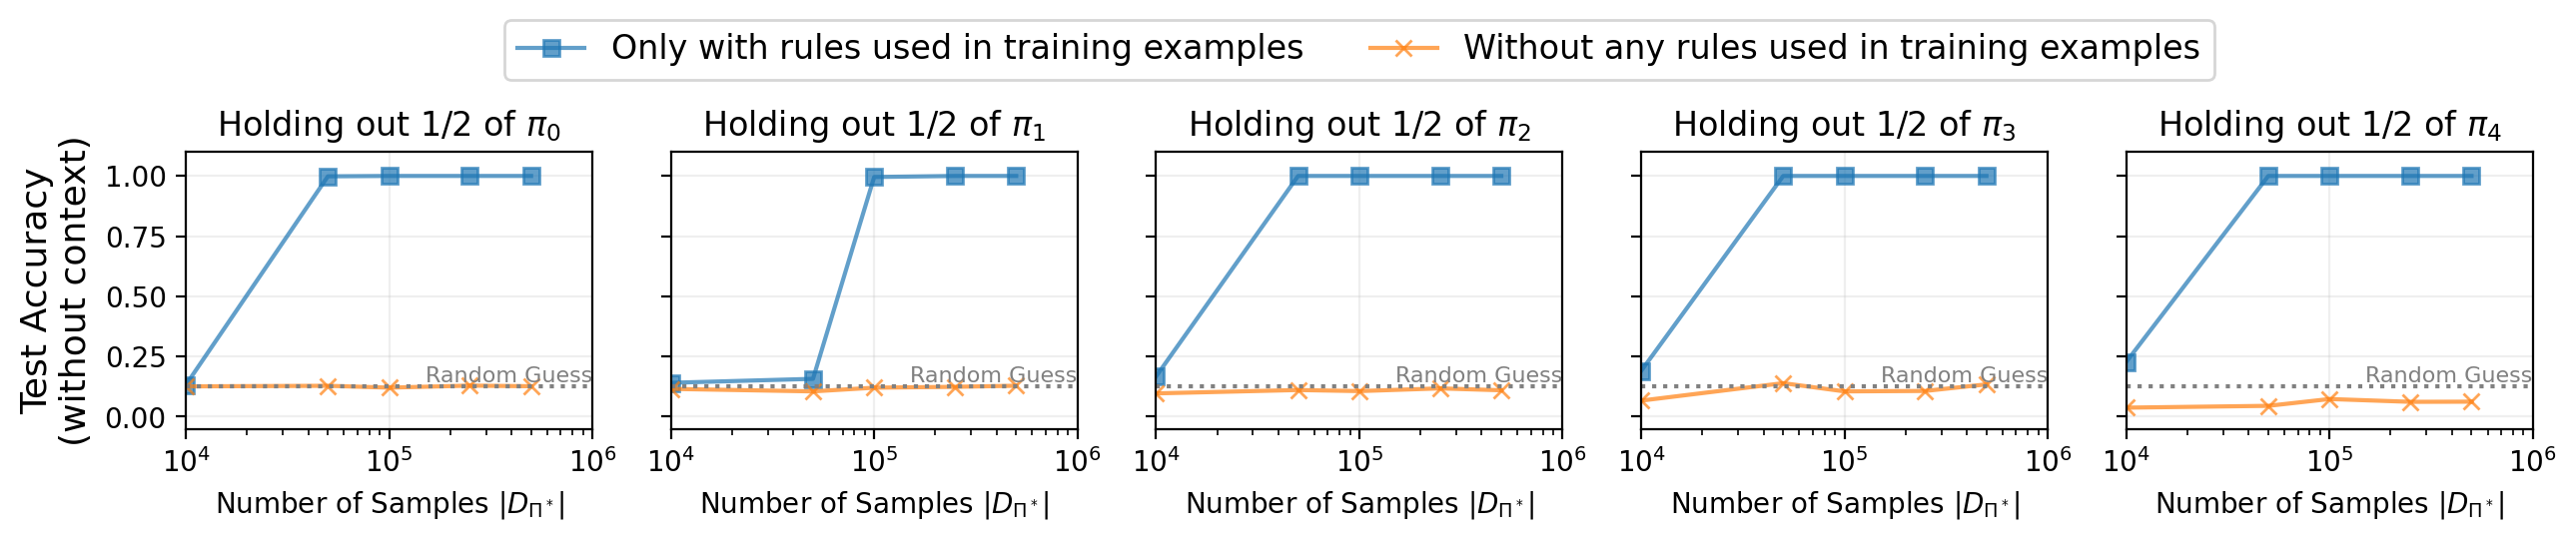

In [81]:

plt.figure(figsize=(13, 2.8), dpi=200)
gs = plt.GridSpec(2, 5, width_ratios=[1, 1, 1, 1, 1], height_ratios=[0.2, 1])

for i in range(5):
    ax1 = plt.subplot(gs[1, i])
    ax1.set_title(fr"Holding out 1/2 of $\pi_{i}$")
    for k in ['ID', 'HO']:
        raw_data = total_metas[i][k]
        raw_data.sort(key=lambda x: x[0])
        data = np.array(raw_data)
        if k == 'ID':
            ax1.plot(data[:, 0], data[:, 1], color='tab:blue', markersize=6, marker='s', alpha=0.7, label='Only with rules used in training examples')
        else:
            ax1.plot(data[:, 0], data[:, 1], color='tab:orange', markersize=6, marker='x', alpha=0.7, label='Without any rules used in training examples')
    
    ax1.set_xlim([1e4, 1e6])
    ax1.set_xscale('log')
    # ax1.legend(loc='lower right')

    ax1.axhline(y=0.125, color='gray', linestyle=':')
    ax1.set_xscale('log')
    ax1.set_xlabel(r"Number of Samples $|D_{\Pi^*}|$")
    ax1.text(1e6, 0.17, 'Random Guess', color='gray', fontsize=8, va='center', ha='right')
    ax1.set_ylim([-0.05, 1.1])
    ax1.set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax1.grid(True, alpha=0.2)

    if i == 0:
        ax1.set_ylabel("Test Accuracy\n(without context)", fontsize=13)
    else:
        ax1.set_yticklabels([])

ax_legend = plt.subplot(gs[0, :])
ax_legend.axis('off')
ax_legend.legend(*ax1.get_legend_handles_labels(), loc='center', fontsize=12, ncol=2)

plt.tight_layout()
plt.savefig('heldout_accuracy.pdf')
plt.show()